In [24]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=Warning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.model_selection import train_test_split

data = pd.read_csv("dataset_thyroid_sick.csv")
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG','referral_source','query_on_thyroxine'], axis=1)

In [26]:
#remoção de linhas com ?, substituição de valores boolean para int, assim como as da string das labels
data = data[data != '?']
data = data.dropna()
data = data.replace({'negative': 0, 'sick': 1})
data = data.replace({'t': 1, 'f': 0})
data = data.replace({'M': 1, 'F': 0})
data.reset_index(drop=True)

,age,sex,on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125,1.14,109,0
1,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61,0.87,70,0
2,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.2,0.6,80,0.7,115,1
3,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.6,2.2,123,0.93,132,0
4,68,1,0,0,0,0,0,0,0,0,...,0,0,0,0,2.4,1.6,83,0.89,93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8.8,2.7,108,1.11,97,0
2639,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2.1,124,1.08,114,0
2640,74,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5.1,1.8,112,1.07,105,0
2641,72,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.7,2,82,0.94,87,0


In [20]:
#normalização
data['normTSH'] = StandardScaler().fit_transform(data['TSH'].values.reshape(-1, 1))
data['normT3'] = StandardScaler().fit_transform(data['T3'].values.reshape(-1, 1))
data['normTT4'] = StandardScaler().fit_transform(data['TT4'].values.reshape(-1, 1))
data['normT4U'] = StandardScaler().fit_transform(data['T4U'].values.reshape(-1, 1))
data['normFTI'] = StandardScaler().fit_transform(data['FTI'].values.reshape(-1, 1))
data['normAge'] = StandardScaler().fit_transform(data['age'].values.reshape(-1, 1))
data = data.drop(['TSH','T3','TT4','FTI','T4U','age'], axis=1)
corrMatrix = data.corr().abs()
relevant_features = corrMatrix.Class
print(relevant_features)
data = data.drop(['sex','on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','normTSH','normFTI'], axis=1)
print(data)

sex                          0.031026
on_thyroxine                 0.047857
on_antithyroid_medication    0.033206
sick                         0.095957
pregnant                     0.037069
thyroid_surgery              0.033206
I131_treatment               0.025198
query_hypothyroid            0.087127
query_hyperthyroid           0.035175
lithium                      0.002360
goitre                       0.009712
tumor                        0.025218
hypopituitary                0.065881
psych                        0.043358
Class                        1.000000
normTSH                      0.008004
normT3                       0.397419
normTT4                      0.126986
normT4U                      0.243390
normFTI                      0.022079
normAge                      0.164829
Name: Class, dtype: float64
      Class    normT3   normTT4   normT4U   normAge
0         0  0.605651  0.483484  0.734949 -0.593285
4         0 -0.972673 -1.321686 -0.639743  0.830789
7         1 -1.701

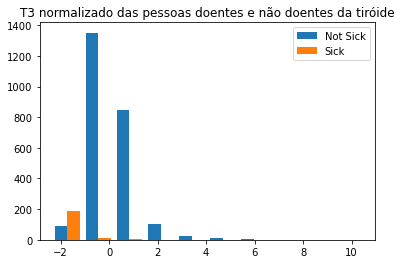

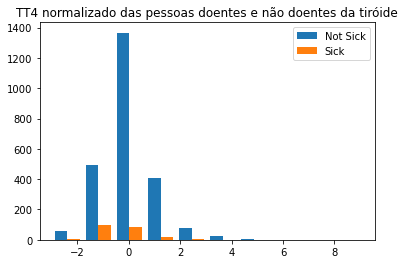

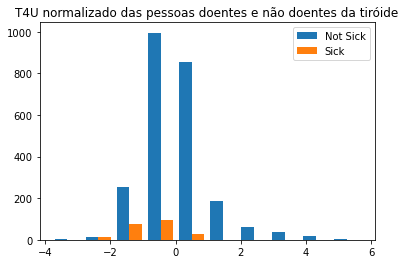

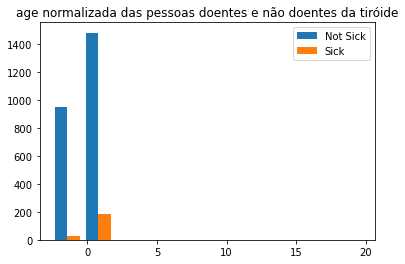

In [76]:
# plots

# histograma normT3
data_0 = data.loc[:,["normT3","Class"]]
data_1 = data.loc[:,["normT3","Class"]]
x = data_0[data_0.Class == 0]
y = data_1[data_1.Class == 1]
plt.hist([x.normT3, y.normT3], label=['Not Sick', 'Sick'])
plt.legend(loc='upper right')
plt.title("T3 normalizado das pessoas doentes e não doentes da tiróide")
plt.savefig('hist_normT3.png')
plt.show()

# histograma normTT4
data_0 = data.loc[:,["normTT4","Class"]]
data_1 = data.loc[:,["normTT4","Class"]]
x = data_0[data_0.Class == 0]
y = data_1[data_1.Class == 1]
plt.hist([x.normTT4, y.normTT4], label=['Not Sick', 'Sick'])
plt.legend(loc='upper right')
plt.title("TT4 normalizado das pessoas doentes e não doentes da tiróide")
plt.savefig('hist_normTT4.png')
plt.show()

# histograma normT4U
data_0 = data.loc[:,["normT4U","Class"]]
data_1 = data.loc[:,["normT4U","Class"]]
x = data_0[data_0.Class == 0]
y = data_1[data_1.Class == 1]
plt.hist([x.normT4U, y.normT4U], label=['Not Sick', 'Sick'])
plt.legend(loc='upper right')
plt.title("T4U normalizado das pessoas doentes e não doentes da tiróide")
plt.savefig('hist_normT4U.png')
plt.show()
     
# histograma normAge
data_0 = data.loc[:,["normAge","Class"]]
data_1 = data.loc[:,["normAge","Class"]]
x = data_0[data_0.Class == 0]
y = data_1[data_1.Class == 1]
plt.hist([x.normAge, y.normAge], label=['Not Sick', 'Sick'])
plt.legend(loc='upper right')
plt.title("age normalizada das pessoas doentes e não doentes da tiróide")
plt.savefig('hist_normAge.png')
plt.show()

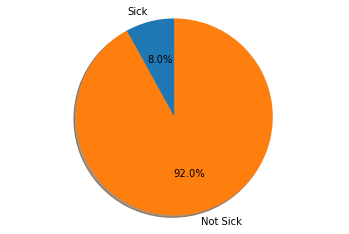

212 2431


,Class,normT3,normTT4,normT4U,normAge
7,1,-1.701131,-0.785776,-1.505291,1.321849
22,1,-2.065359,-0.165249,-0.181512,1.370955
46,1,-1.336902,-0.616541,-1.199803,1.469167
48,1,-0.365625,1.527098,-0.639743,1.665591
50,1,-1.215492,-0.137043,-0.741572,0.536153
...,...,...,...,...,...
923,0,-0.608444,-1.321686,-0.436085,-0.298649
3212,0,-0.608444,0.596307,0.123975,0.634365
3165,0,-0.851264,0.370661,-1.097974,-1.870041
3055,0,-0.244216,-0.447307,-0.741572,-0.642391


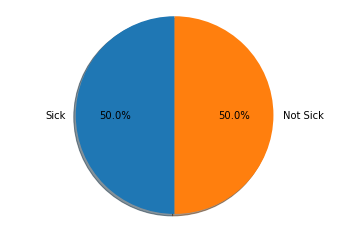

In [77]:
# undersampled data
number_sick = len(data[data.Class == 1])
number_normal = len(data[data.Class == 0])


# Pie chart of the sick/not sick people
labels = 'Sick', 'Not Sick'
sizes = [number_sick, number_normal]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.show()


print(number_sick, number_normal)
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

sick_indices = np.array(data[data.Class == 1].index)
normal_indices = np.array(data[data.Class == 0].index)

random_normal_indices = np.random.choice(normal_indices, number_sick, replace = False)

under_sample_indices = np.concatenate([sick_indices, random_normal_indices])

under_sample_data = data.loc[under_sample_indices,:]

# Pie chart of the sick/not sick people after under-sampling
sizes = [number_sick, len(random_normal_indices)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']


under_sample_data

In [78]:
# separação dos dados em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

# cálculo do melhor hyper-parameter
def print_gridsearch_scores(x_train_data,y_train_data):
    c_param_range = [0.01,0.1,1,10]

    clf = GridSearchCV(LogisticRegression(), {"C": c_param_range}, cv=5, scoring='recall')
    clf.fit(x_train_data,y_train_data) # x sao as features e y as labels

    print("Best parameters found on CV(dev) set:")
    print()
    print(clf.best_params_)

    print("K-fold Score (Recall) on CV (dev) set:")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        
    return clf.best_params_["C"]
best_c = print_gridsearch_scores(X_train_undersample, y_train_undersample)

Best parameters found on CV(dev) set:

{'C': 1}
K-fold Score (Recall) on CV (dev) set:
0.853 (+/-0.081) for {'C': 0.01}
0.882 (+/-0.092) for {'C': 0.1}
0.896 (+/-0.106) for {'C': 1}
0.896 (+/-0.106) for {'C': 10}


In [7]:
# regressão linear treinada e testada com os dados under-sampled
lr = LogisticRegression(C = best_c)
lr.fit(X_train_undersample,y_train_undersample)
y_pred_undersample = lr.predict(X_test_undersample)

# cálculo da confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)

print('Confusion matrix (undersample test dataset)')
print(cnf_matrix)

# cálculo da accuracy, precision, recall
precision = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])
recall = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
print("Accuracy: ", (cnf_matrix[1, 1] + cnf_matrix[0, 0]) / (cnf_matrix[1, 1] + cnf_matrix[1, 0]) + cnf_matrix[0, 1] + cnf_matrix[0, 0])
print("Precison: ", precision)
print("Recall: ", recall)
print("F1 Score: ", 2*(recall*precision)/(recall+precision))

Confusion matrix (undersample test dataset)
[[51  8]
 [ 5 64]]
Accuracy:  60.666666666666664
Precison:  0.8888888888888888
Recall:  0.927536231884058
F1 Score:  0.9078014184397163


In [8]:
# regressão linear treinada com os dados under-sampled e testado com o conjunto total dos dados de teste

lr2 = LogisticRegression(C = best_c)

lr2.fit(X_train_undersample,y_train_undersample)

y_pred = lr2.predict(X_test)

#matriz confusão
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

# cálculo da precision, recall
precision_2 = cnf_matrix[1, 1] / (cnf_matrix[0, 1] + cnf_matrix[1, 1])
recall_2 = cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1])
print("Precison: ", precision_2)
print("Recall: ", recall_2)
print("F1 Score: ", 2*(recall_2*precision_2)/(recall_2 + precision_2))

[[637  94]
 [  7  55]]
Precison:  0.3691275167785235
Recall:  0.8870967741935484
F1 Score:  0.5213270142180095


In [1]:
lr = LogisticRegression(C = best_c) # , penalty = 'l1') o primaço não funciona
lr.fit(X_train_undersample,y_train_undersample)
y_pred_undersample_score=lr.decision_function(X_test_undersample)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_undersample,y_pred_undersample_score)

# Compute Area Under the ROC Curve (AUC), it is a scalar 
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_graph.png')
plt.show()

NameError: name 'LogisticRegression' is not defined